## Long

### Code for loading datasets

In [13]:
#Import necessary libs
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns #For heatmap
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)


Loading all the handed out data:

In [5]:
# Train target for each location:
train_a = pd.read_parquet('data/A/train_targets.parquet')
train_b = pd.read_parquet('data/B/train_targets.parquet')
train_c = pd.read_parquet('data/C/train_targets.parquet')

# Estimated training data for each location
X_train_estimated_a = pd.read_parquet('data/A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('data/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('data/C/X_train_estimated.parquet')

# Observed training data for each location
X_train_observed_a = pd.read_parquet('data/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('data/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('data/C/X_train_observed.parquet')

# Estimated test data for each location
X_test_estimated_a = pd.read_parquet('data/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('data/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('data/C/X_test_estimated.parquet')



Features in the observed and estimated X. For plotting.

['date_forecast',
 'absolute_humidity_2m:gm3',
 'air_density_2m:kgm3',
 'ceiling_height_agl:m',
 'clear_sky_energy_1h:J',
 'clear_sky_rad:W',
 'cloud_base_agl:m',
 'dew_or_rime:idx',
 'dew_point_2m:K',
 'diffuse_rad:W',
 'diffuse_rad_1h:J',
 'direct_rad:W',
 'direct_rad_1h:J',
 'effective_cloud_cover:p',
 'elevation:m',
 'fresh_snow_12h:cm',
 'fresh_snow_1h:cm',
 'fresh_snow_24h:cm',
 'fresh_snow_3h:cm',
 'fresh_snow_6h:cm',
 'is_day:idx',
 'is_in_shadow:idx',
 'msl_pressure:hPa',
 'precip_5min:mm',
 'precip_type_5min:idx',
 'pressure_100m:hPa',
 'pressure_50m:hPa',
 'prob_rime:p',
 'rain_water:kgm2',
 'relative_humidity_1000hPa:p',
 'sfc_pressure:hPa',
 'snow_density:kgm3',
 'snow_depth:cm',
 'snow_drift:idx',
 'snow_melt_10min:mm',
 'snow_water:kgm2',
 'sun_azimuth:d',
 'sun_elevation:d',
 'super_cooled_liquid_water:kgm2',
 't_1000hPa:K',
 'total_cloud_cover:p',
 'visibility:m',
 'wind_speed_10m:ms',
 'wind_speed_u_10m:ms',
 'wind_speed_v_10m:ms',
 'wind_speed_w_1000hPa:ms']

### Visualizing the data

Plotting the power production of each office building

<Axes: title={'center': 'Train target C'}, xlabel='time'>

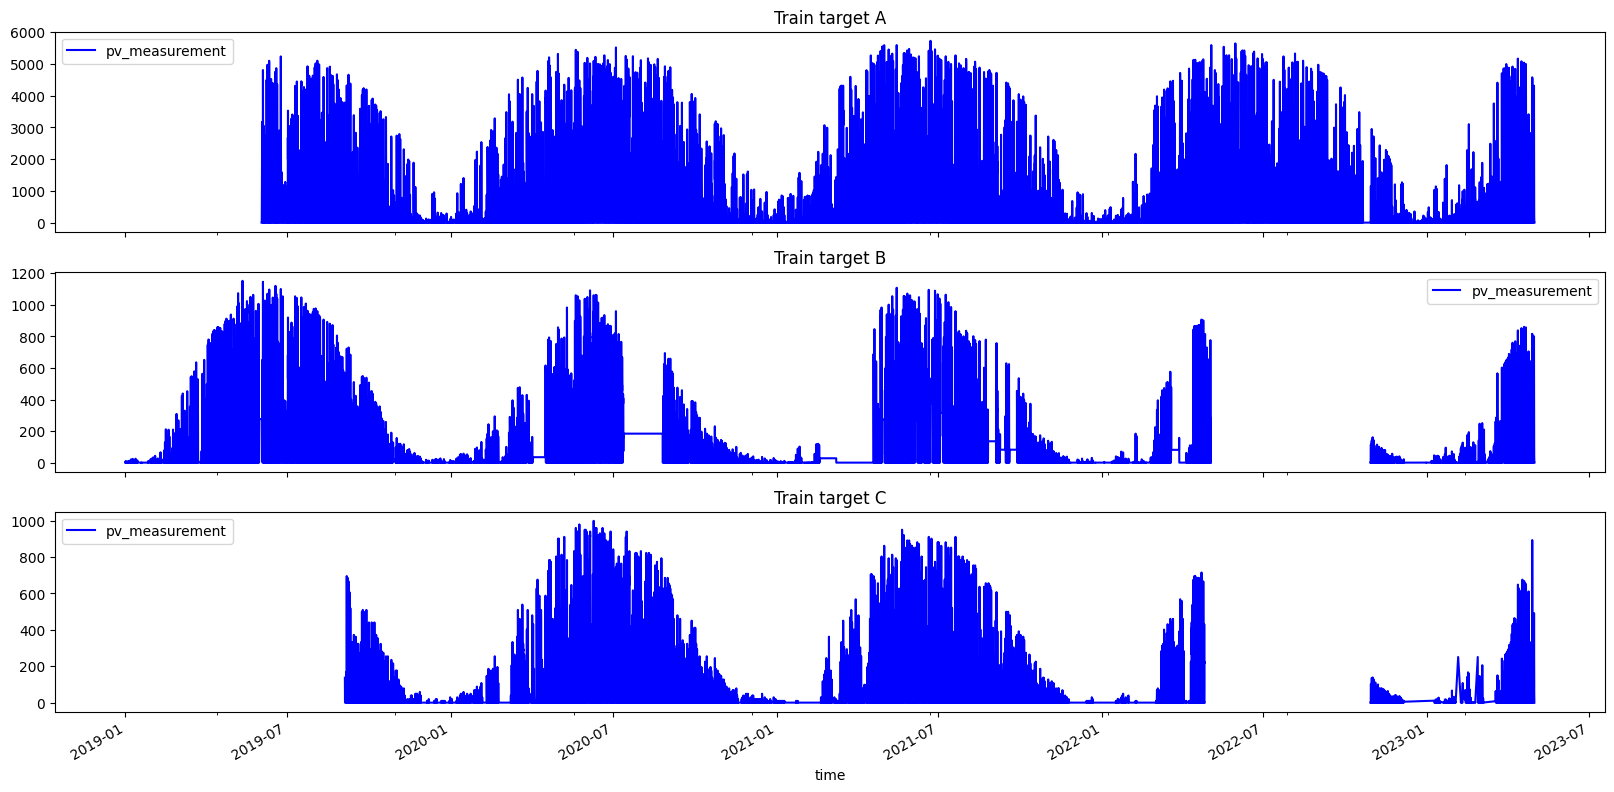

In [4]:
# Power production plots
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
train_a[['time', 'pv_measurement']].set_index('time').plot(ax=axs[0], title='Train target A', color='blue')
train_b[['time', 'pv_measurement']].set_index('time').plot(ax=axs[1], title='Train target B', color='blue')
train_c[['time', 'pv_measurement']].set_index('time').plot(ax=axs[2], title='Train target C', color='blue')


<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

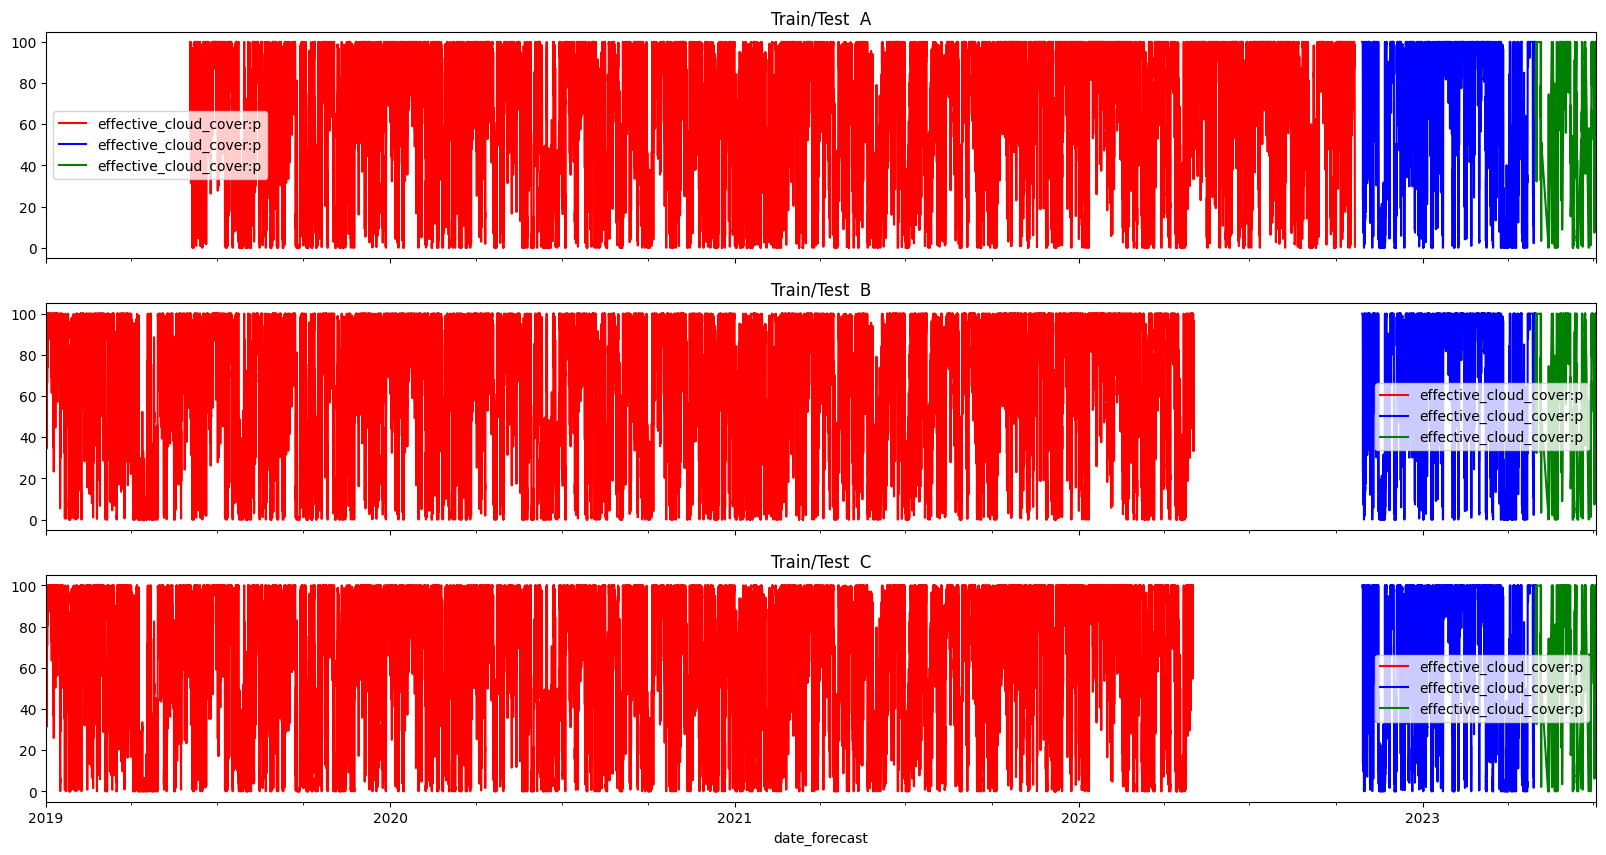

In [6]:
# Plotting a single feature
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'effective_cloud_cover:p'
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')

We present some heatmaps of the correlation matrices in order to get an impression of redundancies (?).

/Users/johanvikmathisen/Desktop/Fag/Matematikk/Solar-Energy-Prediction/.venv/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


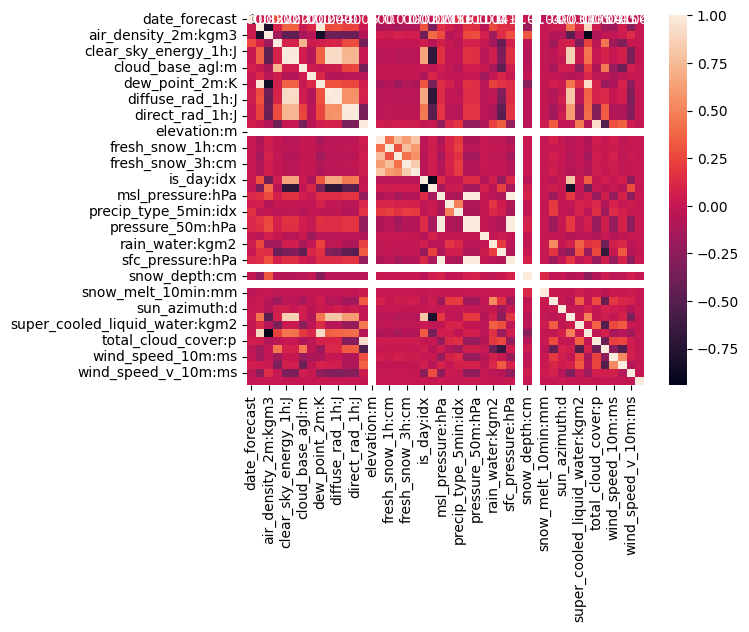

In [12]:
#correlation matrix and heatmap

corr = X_train_observed_a.corr().round(2)
sns.heatmap(corr, annot=True)
plt.show()

/Users/johanvikmathisen/Desktop/Fag/Matematikk/Solar-Energy-Prediction/.venv/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


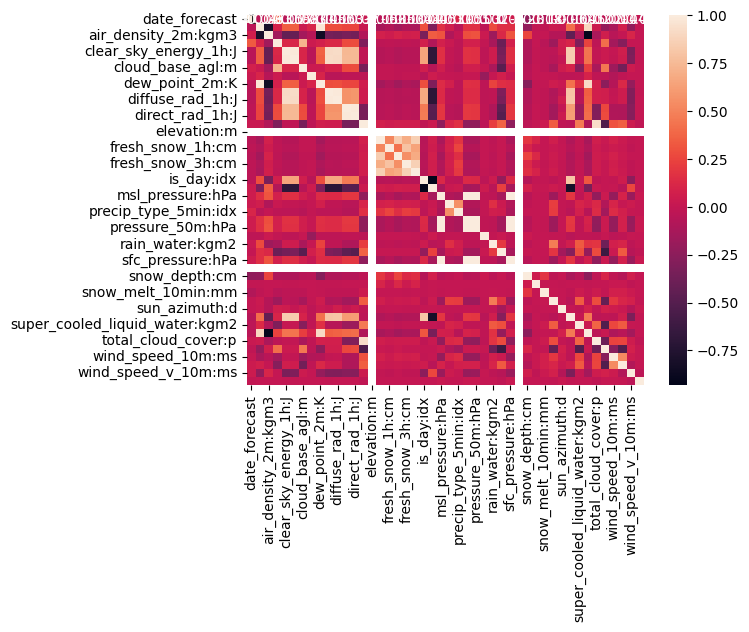

In [9]:
corr = X_train_observed_b.corr().round(2)
sns.heatmap(corr, annot=True)
plt.show()

/Users/johanvikmathisen/Desktop/Fag/Matematikk/Solar-Energy-Prediction/.venv/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


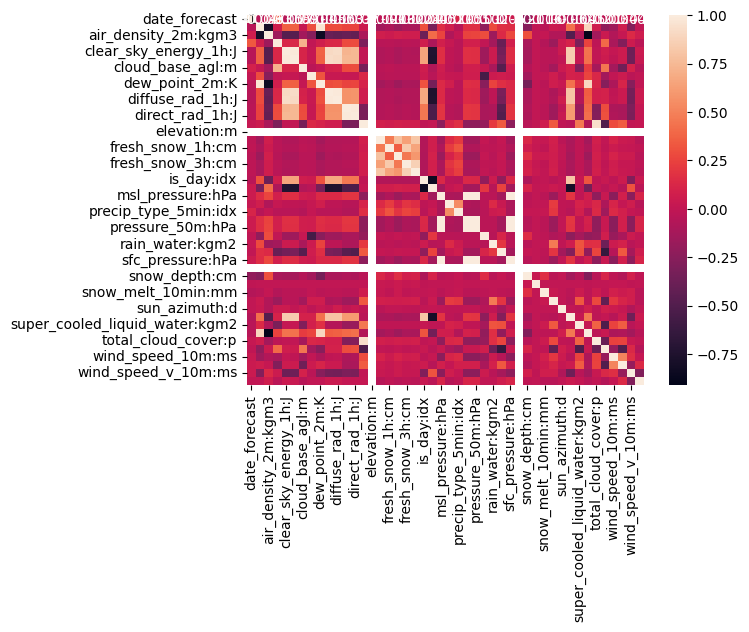

In [10]:
corr = X_train_observed_c.corr().round(2)
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
#Code used to make merged datasets:

#Make merged datasets

#add location as feature:
X_test_estimated_a['location'] = 'A'
X_test_estimated_b['location'] = 'B'
X_test_estimated_c['location'] = 'C'

frames = [X_test_estimated_a, X_test_estimated_b, X_test_estimated_c]

X_test_estimated_merge = pd.concat(frames)

# sort by date_forecast
X_test_estimated_merge = X_test_estimated_merge.sort_values(by= 'date_forecast')

# X_test_estimated_merge.to_parquet(path = 'merge/X_test_estimated_merge.parquet')